# 1ª Avaliação de Programação Estatística com Python - 10/12/2019



   * Nome: \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_
   * Matrícula: \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_

**Questão 1 (1,0 ponto)** Implemente uma função que gere $C$ matrizes $\mathbf{X}_c^{n_c \times p}$, $c = 1, \ldots, C$, aleatoriamente, onde $n_c$ é a quantidade de linhas da matriz $\mathbf{X}_c$. As $p$ colunas de cada matriz $\mathbf{X}_c$ devem ser sorteadas de distribuições normais com médias e variâncias diferentes. A função deve então concatenar todas as matrizes geradas e retornar a matriz $\mathbf{X}^{n \times p}$, onde $n = \sum_{c=1}^C n_c$. <ins>Dica 1</ins>: A função pode receber como parâmetros uma lista com a quantidade de linhas de cada matriz $\mathbf{X}_c$, uma lista com as médias das normais usadas para gerar as colunas de cada matriz e outra lista com as variâncias correspondentes. <ins>Dica 2</ins>: considere usar a função *numpy.random.multivariate_normal*.

In [1]:
import numpy as np

# Versão sem usar multivariate_normal
def generate_data(n_list, means_list, variances_list):
    X = []
    for nc, means, variances in zip(n_list, means_list, variances_list):
        p = len(means)
        X_c = np.zeros((nc, p))
        for j in range(p):
            X_c[:, j] = np.random.normal(means[j], np.sqrt(variances[j]), nc)  # a função recebe o desvio
        X.append(X_c)
    return np.vstack(X)

X = generate_data([5, 5, 5], [[1, 1], [4, 4], [0, 0]], [[1, 1], [0.1, 0.1], [0.5, 0.5]])
print(X)

[[-1.16668251 -0.04910052]
 [-1.74726534  0.63723312]
 [ 3.00237807  0.06470986]
 [-0.19567212 -0.92555037]
 [ 0.47449731  1.05147478]
 [ 4.20447077  3.78300365]
 [ 3.95861625  3.41936736]
 [ 4.47495091  4.3351307 ]
 [ 4.28805216  4.05549332]
 [ 4.17890162  4.43950875]
 [-0.75953254 -1.12008043]
 [-0.76773092 -0.25299088]
 [ 1.84829889 -1.01222936]
 [-0.48827746  0.10148525]
 [-0.55759916  0.450323  ]]


In [2]:
import numpy as np

# Versão usando multivariate_normal
def generate_multivariate_data(n_list, means_list, variances_list):
    X = []
    for nc, means, variances in zip(n_list, means_list, variances_list):
        X_c = np.random.multivariate_normal(
            means, 
            np.diag(variances),   # a função recebe uma matriz de covariâncias
            nc
        )
        X.append(X_c)
    return np.vstack(X)

X = generate_multivariate_data([5, 5, 5], [[1, 1], [4, 4], [0, 0]], [[1, 1], [0.1, 0.1], [0.5, 0.5]])
print(X)

[[-0.0278804   0.66662924]
 [ 1.82737745  0.73494604]
 [ 0.82382238  1.9512209 ]
 [ 0.72695539  0.30055291]
 [ 2.13489148 -0.18150803]
 [ 4.4167333   3.81067085]
 [ 3.75821149  3.92222336]
 [ 3.84939886  4.0076921 ]
 [ 3.67492327  3.6934356 ]
 [ 4.47246499  3.85338941]
 [-0.56361369 -1.31876945]
 [-0.24771132  0.47073555]
 [ 1.23122817 -0.66397947]
 [ 0.46262594 -0.19577522]
 [ 0.22550958  0.56287151]]


**Comentário:** Era necessário definir explicitamente o tamanho de cada matriz $\mathbf{X}_c^{n_c \times p}$, portanto quem feza geração das matrizes com quantidades aleatórias de linhas não cumpriu os requisitos do enunciado corretamente.

**Questão 2 (1,0 ponto)** Faça uma função que recebe uma matriz $\mathbf{X}^{n \times p}$ e um inteiro $k$ e retorna uma matriz $W^{k \times p}$, cujas linhas foram selecionadas aleatoriamente e sem reposição de $\mathbf{X}^{n \times p}$.

In [13]:
def select_prototypes(X, k):
    selected = np.random.choice(len(X), k, replace=False)
    return X[selected]

W = select_prototypes(X, 3)
print(W)

[[ 2.13489148 -0.18150803]
 [-0.0278804   0.66662924]
 [ 3.67492327  3.6934356 ]]


**Questão 3 (1,0 ponto)** Faça uma função que recebe duas matrizes $\mathbf{X}^{n \times p}$ e $\mathbf{W}^{k \times p}$ e retorna a matriz de distâncias Euclidianas $\mathbf{D}^{n \times k}$ entre as linhas de $\mathbf{X}$ e as de $\mathbf{W}$.

In [4]:
# Versão simples e menos otimizada
def calc_distances(X, W):
    n, k = len(X), len(W)
    distances = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            distances[i, j] = np.sqrt(np.sum((X[i] - W[j]) ** 2))
    return distances

D = calc_distances(X, W)
print(D)

from scipy.spatial.distance import cdist  # para comparar
print(np.sum(D - cdist(X, W)))  # se a função calc_distances estiver certa, esta soma será 0

[[1.54128951 0.99213805 5.51439471]
 [1.57684727 1.65190458 4.08915359]
 [0.         2.17716678 4.11470994]
 [1.65350779 0.56232701 5.16250805]
 [2.50348455 1.6723264  4.66311562]
 [4.0455609  5.62908297 0.07022035]
 [3.53489606 5.2743527  0.71756265]
 [3.65830382 5.39808932 0.64188839]
 [3.34127047 5.04428537 0.81342363]
 [4.11470994 5.69864399 0.        ]
 [3.55215649 1.52127704 7.21895531]
 [1.82757252 0.97407168 5.80710009]
 [2.64674375 0.89998034 5.55987749]
 [2.17716678 0.         5.69864399]
 [1.51178445 0.79483899 5.37253555]]
0.0


In [5]:
# Versão "mais complicada" e otimizada
def calculate_distances(X, W):
    distances = np.sqrt(
        (
            (X - W[:, np.newaxis])**2  # o índice np.newaxis torna W uma matriz 3D que pode ser propagada corretamente pela linhas de X
        ).sum(axis=2)).transpose()
    return distances

D = calculate_distances(X, W)
print(D)

print(np.sum(D - cdist(X, W)))  # se a função estiver certa, esta soma será 0

[[1.54128951 0.99213805 5.51439471]
 [1.57684727 1.65190458 4.08915359]
 [0.         2.17716678 4.11470994]
 [1.65350779 0.56232701 5.16250805]
 [2.50348455 1.6723264  4.66311562]
 [4.0455609  5.62908297 0.07022035]
 [3.53489606 5.2743527  0.71756265]
 [3.65830382 5.39808932 0.64188839]
 [3.34127047 5.04428537 0.81342363]
 [4.11470994 5.69864399 0.        ]
 [3.55215649 1.52127704 7.21895531]
 [1.82757252 0.97407168 5.80710009]
 [2.64674375 0.89998034 5.55987749]
 [2.17716678 0.         5.69864399]
 [1.51178445 0.79483899 5.37253555]]
0.0


In [6]:
# Comparação entre os tempos de execução das duas funções
# Só por curiosidade
%timeit calc_distances(X, W)
%timeit calculate_distances(X, W)

# A versão otimizada leva em média apenas 3% do tempo da versão lenta

277 µs ± 7.65 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.87 µs ± 74.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Questão 4 (1,0 ponto)** Qual função de NumPy pode ser usada para obter para cada linha da matriz $\mathbf{D}$, retornada pela função da questão acima, a coluna que representa a menor distância da linha correspondente em $\mathbf{X}$ para as linhas de $\mathbf{W}$? Use a função para retornar essa informação.

In [7]:
np.argmin(D, axis=1)

array([1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

**Questão 5 (2,0 pontos)** Faça uma função que atualiza as linhas de $\mathbf{W}$, fazendo com que cada linha assuma o valor médio das linhas de $\mathbf{X}$ para as quais a mesma foi a mais próxima. Use a função de NumPy mencionada na Questão 4.

In [14]:
print(W)
def update_prototypes(X, W, D):
    partition = np.argmin(D, axis=1)
    k = len(W)
    for c in range(k):
        W[c] = np.mean(X[partition == c], axis=0)
    return W

print(update_prototypes(X, W, D))
print(W)  # dentro da função, o código modifica a matriz W diretamente, portanto ela está modificada neste escopo

[[ 2.13489148 -0.18150803]
 [-0.0278804   0.66662924]
 [ 3.67492327  3.6934356 ]]
[[ 1.32559992  1.34308347]
 [ 0.49275064 -0.04490537]
 [ 4.03434638  3.85748226]]
[[ 1.32559992  1.34308347]
 [ 0.49275064 -0.04490537]
 [ 4.03434638  3.85748226]]


**Questão 6 (1,5 pontos)** Implemente uma classe, chamada *KMeans*, cujo construtor define os seguintes atributos: $k$ e $t_{max}$. A classe deve conter um método *fit*, que recebe como parâmetro uma matriz $\mathbf{X}$. O método *fit* irá então seguir os seguintes passos:

  1. Use a função implementada na Questão 2 para obter a matriz $\mathbf{W}$ (note que o segundo parâmetro da função receberá como argumento um dos atributos definidos no construtor);
  2. Repita as operações abaixo $t_{max}$ vezes (note que isso é um atributo):
    1. Use a função da Questão 3 para calcular as distâncias entre $\mathbf{X}$ e $\mathbf{W}$
    2. Use a função da Questão 5 para atualizar as linhas de $\mathbf{W}$

Ao final do método *fit*, a matriz $\mathbf{W}$ resultante deve ser guardada como um atributo.

In [46]:
class KMeans:
    def __init__(self, k, t_max):
        self.k = k
        self.t_max = t_max
        
    def fit(self, X):
        self.W = select_prototypes(X, self.k)
        for t in range(self.t_max):
            D = calculate_distances(X, self.W)
            self.W = update_prototypes(X, self.W, D)    

np.random.seed(42)
X = generate_multivariate_data([25, 25, 25], [[1, 1], [4, 4], [0, 0]], [[1, 1], [0.1, 0.1], [0.5, 0.5]])
km = KMeans(3, 10)
km.fit(X)

print(km.W)

[[ 0.70104879  1.29035403]
 [ 0.09784317 -0.25240109]
 [ 3.97104622  4.04019939]]


**Comentário:** Muitos erraram ao não atualizar $\mathbf{W}$ corretamente, criando uma nova variável, e.g. *new_X*, no passo de atualização, mas sempre calculando as distâncias usando o $\mathbf{W}$ original

**Questão 7 (1,0 ponto)** Adicione o método *predict* à classe *KMeans*. O método irá receber uma nova matriz $\mathbf{X}$ e irá usar a função de NumPy mencionada na Questão 4 para retornar os índices das linhas de $\mathbf{W}$ mais próximas às linhas de $\mathbf{X}$.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


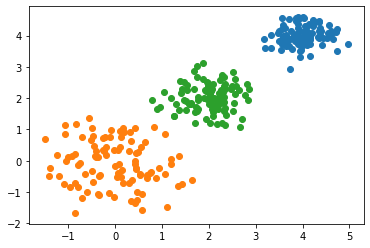

In [47]:
class KMeans:
    def __init__(self, k, t_max):
        self.k = k
        self.t_max = t_max
        
    def fit(self, X):
        self.W = select_prototypes(X, self.k)
        for t in range(self.t_max):
            D = calculate_distances(X, self.W)
            self.W = update_prototypes(X, self.W, D) 
    
    def predict(self, X):
        D = calculate_distances(X, self.W)
        return np.argmin(D, axis=1)    

np.random.seed(42)

X_train = generate_multivariate_data([1000, 1000, 1000], [[2, 2], [4, 4], [0, 0]], [[.2, .2], [.1, .1], [.5, .5]])
k, t_max = 3, 100
km = KMeans(k, t_max)
km.fit(X_train)

X_test = generate_multivariate_data([100, 100, 100], [[2, 2], [4, 4], [0, 0]], [[.2, .2], [.1, .1], [.5, .5]])
predictions = km.predict(X_test)
print(predictions)

import matplotlib.pyplot as plt  # para fazer uma visualização legal (não era obrigatório)

k = len(W)
for c in range(k):
    affected = X_test[predictions == c]
    plt.scatter(affected[:, 0], affected[:, 1])

**Questão 8 (1,5 ponto)** Adicione o método *score* à classe *KMeans*. O método irá receber uma nova matriz $\mathbf{X}$ e irá usar a função da Questão 3 para calcular as distâncias para a matrix $\mathbf{W}$. Após isso, o método retornará o somatório das menores distâncias.

In [54]:
class KMeans:
    def __init__(self, k, t_max):
        self.k = k
        self.t_max = t_max
        
    def fit(self, X):
        self.W = select_prototypes(X, self.k)
        for t in range(self.t_max):
            D = calculate_distances(X, self.W)
            self.W = update_prototypes(X, self.W, D)
            print(
                self.score(X)
            )  # usando o método score para mostrar que as distâncias para os protótipos mais próximos irão diminuir até estabilizar
    
    def predict(self, X):
        D = calculate_distances(X, self.W)
        return np.argmin(D, axis=1)   
    
    def score(self, X):
        D = calculate_distances(X, self.W)
        return np.sum(np.min(D, axis=1))   

np.random.seed(42)

X_train = generate_multivariate_data([1000, 1000, 1000], [[2, 2], [4, 4], [0, 0]], [[.2, .2], [.1, .1], [.5, .5]])
k, t_max = 3, 7
km = KMeans(k, t_max)
km.fit(X_train)

2106.12724685638
1826.974555204151
1825.6646646625722
1825.61605903042
1825.61605903042
1825.61605903042
1825.61605903042
